In [1]:
from fbprophet import Prophet

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

##### 数据加载

In [3]:
train_data = pd.read_csv('train.csv')

In [4]:
#做一个数据探索
train_data

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2
...,...,...,...
18283,18283,25-09-2014 19:00,868
18284,18284,25-09-2014 20:00,732
18285,18285,25-09-2014 21:00,702
18286,18286,25-09-2014 22:00,580


##### 因为日期的格式是dd-mm-yy，我们需要转换成yy-mm-dd-hh的格式，使用pandas的一个日期函数来做

In [5]:
train_data['Datetime'] = pd.to_datetime(train_data['Datetime'], format = '%d-%m-%Y %H:%M')

In [6]:
#再一次进行数据探索
train_data

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2
...,...,...,...
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580


##### 把datetime作为索引

In [7]:
train_data.index = train_data['Datetime']

##### ID没有什么意义，datetime已经被设置成了索引，所以这两个字段都可以被删除

In [8]:
train_data.drop(['Datetime','ID'], axis = 1, inplace=True)

In [9]:
train_data

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


##### 按照天进行重采样

In [10]:
daily_train_data = train_data.resample('D').sum()

In [11]:
daily_train_data

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


##### 接下来创建一个prophet模型

In [12]:
model = Prophet(yearly_seasonality=True,seasonality_prior_scale= 0.1)

##### 因为prophet模型训练的时候需要ds和y两个columns，所以添加到训练集里, 之后就可以删除count列因为y已经和count列是一模一样的

In [13]:
daily_train_data['ds'] = daily_train_data.index

In [14]:
daily_train_data['y'] = daily_train_data['Count']

In [15]:
daily_train_data.drop(['Count'], axis=1,inplace=True)

In [16]:
daily_train_data

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60
...,...,...
2014-09-21,2014-09-21,9102
2014-09-22,2014-09-22,14116
2014-09-23,2014-09-23,13304


##### 使用数据对模型进行训练

In [17]:
model.fit(daily_train_data)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


##### 训练结束之后可以使用模型来预测未来7个月，213天的高铁乘客数量

In [18]:
future = model.make_future_dataframe(periods = 213)
forecast = model.predict(future)

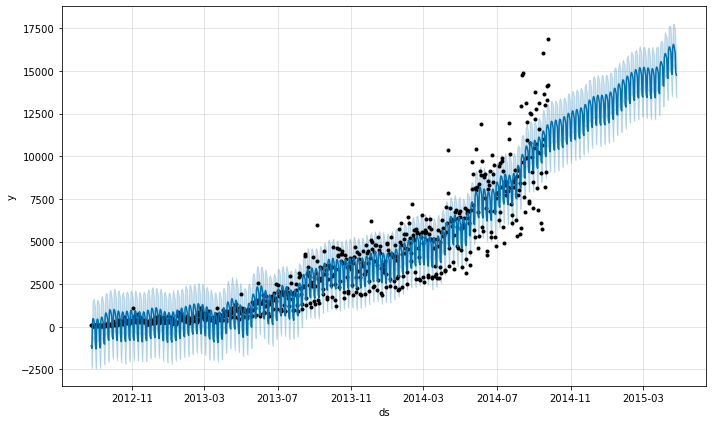

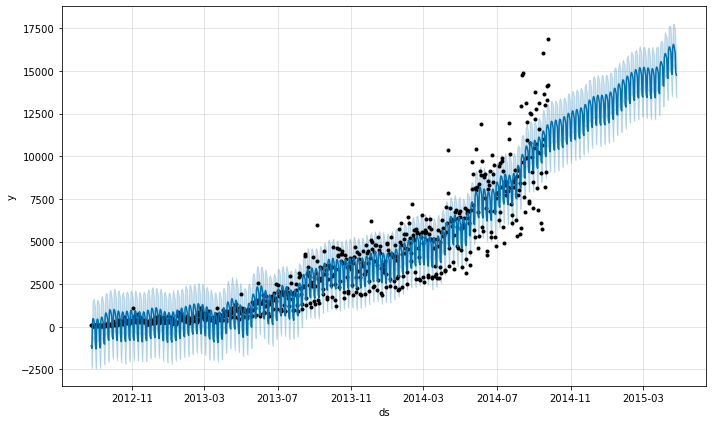

In [19]:
model.plot(forecast)

##### 查看各个components,比如每周或者每年的一个数量走势

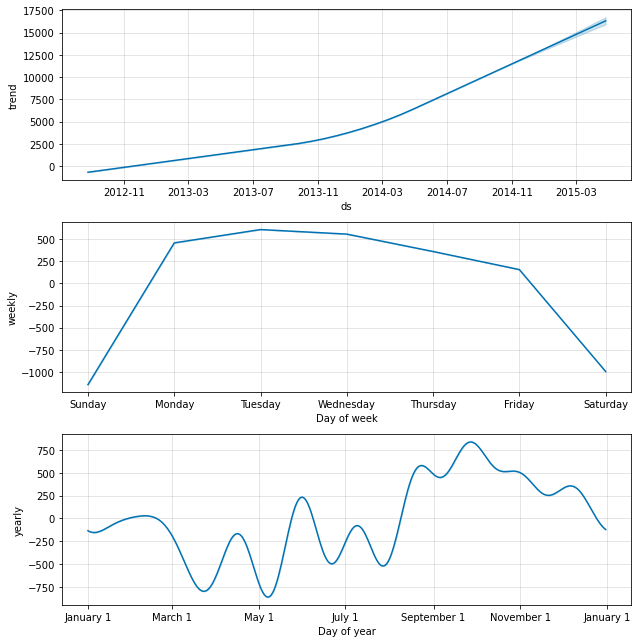

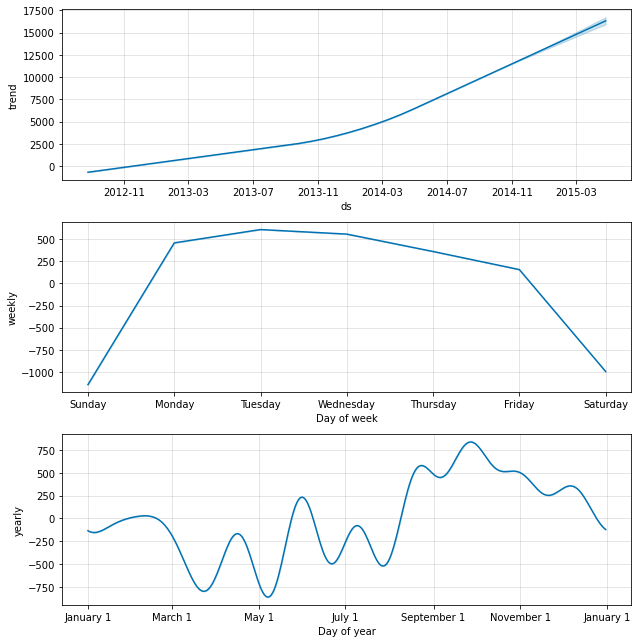

In [20]:
model.plot_components(forecast)